Note: Code snippets and notes are based on "Containerization and Virtualization with Docker and Kubernetes" track from DataCamp. Also some contents are AI generated.

# Part 1: Using Docker Containers


## Running Docker Containers
### The Docker CLI
The Docker command line interface or CLI allows us to send instructions to the Docker daemon, which manages containers and images. The basic command is docker. To start a container, we need an image, which acts as a blueprint defining what will be available in the container.

### Docker container output
If we want to start a container from an image, we can use the docker run command, followed by the image-name. To start the hello-world image, we would use docker run hello world. By default, Docker starts a container and shows you its output while it's running.

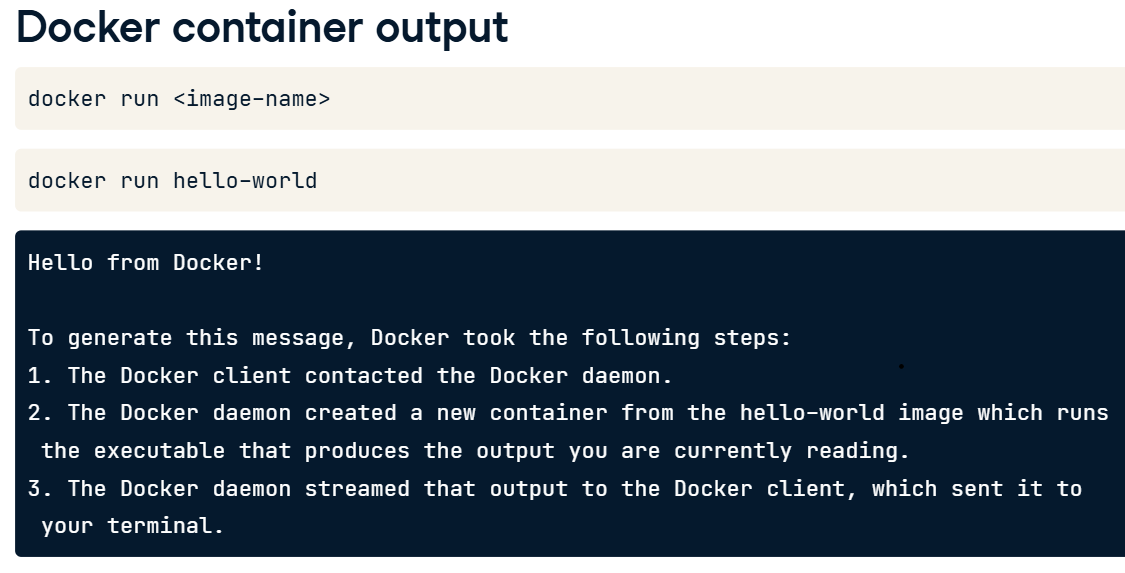

### Choosing Docker container output
When an image is created, the creator can choose what happens when a container is started from the image. For example, the creators of the hello-world image chose to print out text and then make the container stop itself. Another example is the Ubuntu image. When starting an Ubuntu container, it will start and then shut down immediately without printing any output.

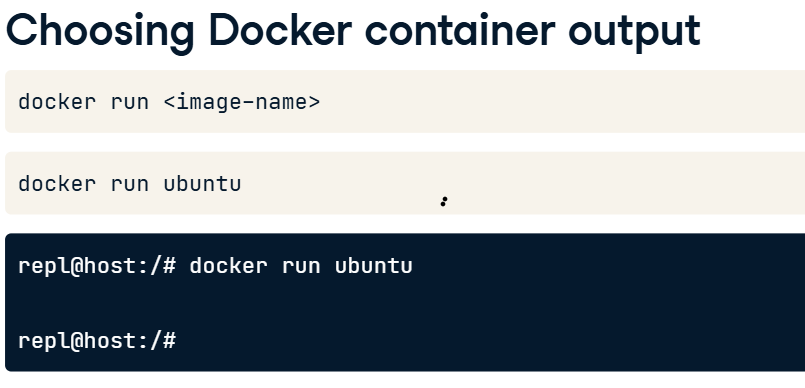

### An interactive Docker container
Using 'docker run dash it' followed by an image-name, we can start a container and simultaneously get an interactive shell in this container. If we do this with the Ubuntu image, we get a new shell inside the new container. The shell gives us access to a clean Ubuntu environment isolated from our host machine because it runs inside the container. Once we want to exit the container, we simply use the exit command, which returns us to the host machine and then stops the container.

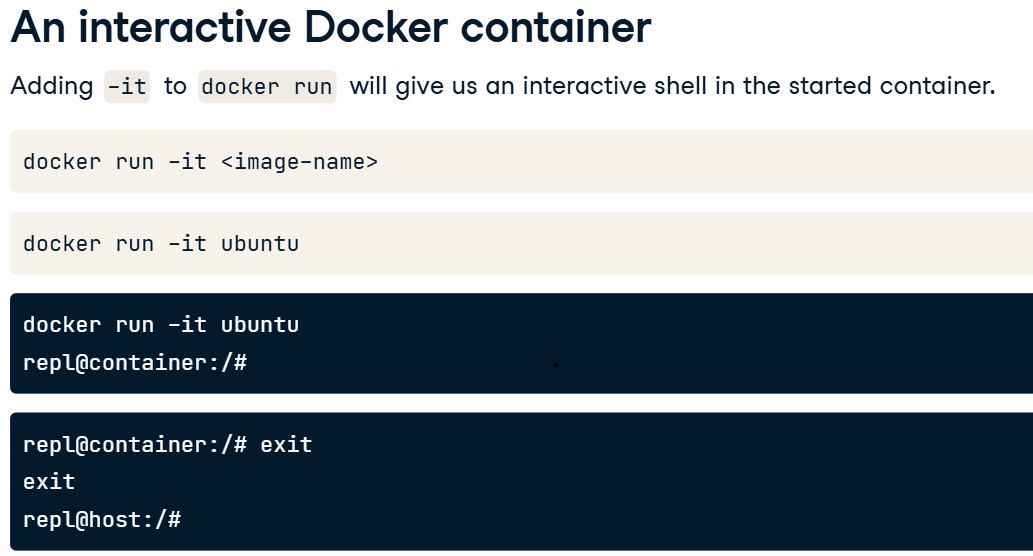

### Running a container detached
A third type of container processes data or can be interacted with in some way externally, for example, a container with a database like Postgres. These are run using Docker run dash d, for detached, followed by the image-name. These containers run in the background without printing their output to our shell.

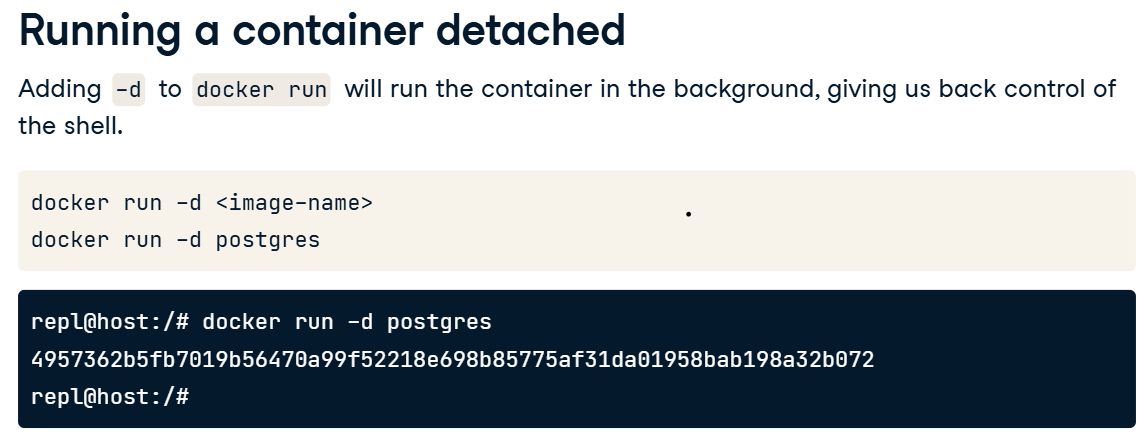

### Listing and stopping running containers
The docker ps command allows us to see any running containers. The first column contains the container-id, uniquely identifying each container. The' docker stop' command can be used to stop containers we no longer need.

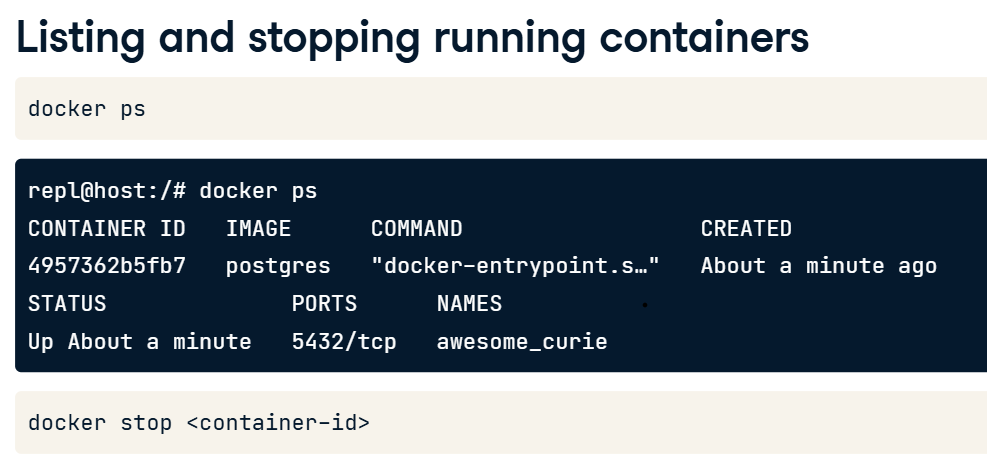

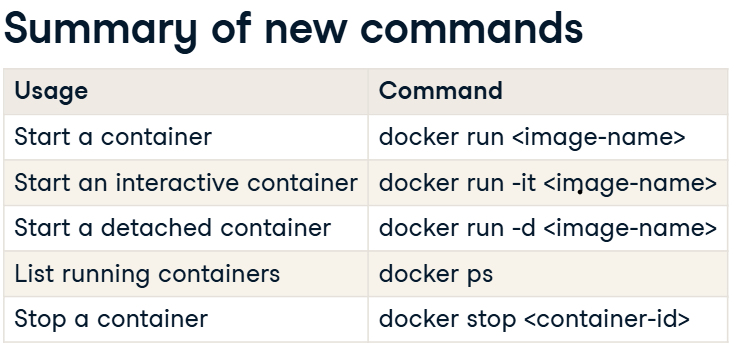

## Working with containers

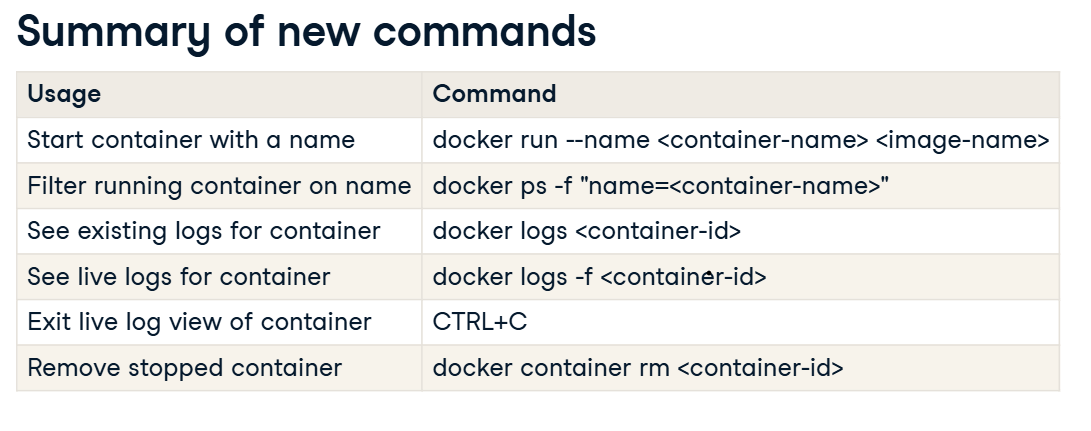

| **Command**                                        | **Description**                                           |
| -------------------------------------------------- | --------------------------------------------------------- |
| `docker run [OPTIONS] IMAGE`                       | Create and start a new container from an image            |
| `docker ps`                                        | List running containers                                   |
| `docker ps -a`                                     | List all containers (including stopped ones)              |
| `docker start [CONTAINER]`                         | Start a stopped container                                 |
| `docker stop [CONTAINER]`                          | Stop a running container                                  |
| `docker restart [CONTAINER]`                       | Restart a container                                       |
| `docker rm [CONTAINER]`                            | Remove a container                                        |
| `docker logs [CONTAINER]`                          | View the logs of a container                              |
| `docker exec -it [CONTAINER] [COMMAND]`            | Run a command in a running container (e.g., open a shell) |
| `docker inspect [CONTAINER]`                       | Get detailed information about a container                |
| `docker top [CONTAINER]`                           | Show running processes inside a container                 |
| `docker attach [CONTAINER]`                        | Attach your terminal to a running container               |
| `docker update [OPTIONS] [CONTAINER]`              | Update configuration of a container                       |
| `docker rename [OLD_NAME] [NEW_NAME]`              | Rename a container                                        |
| `docker cp [CONTAINER]:/path/to/file ./local/path` | Copy files from container to host (or vice versa)         |


## Managing Local Docker Images

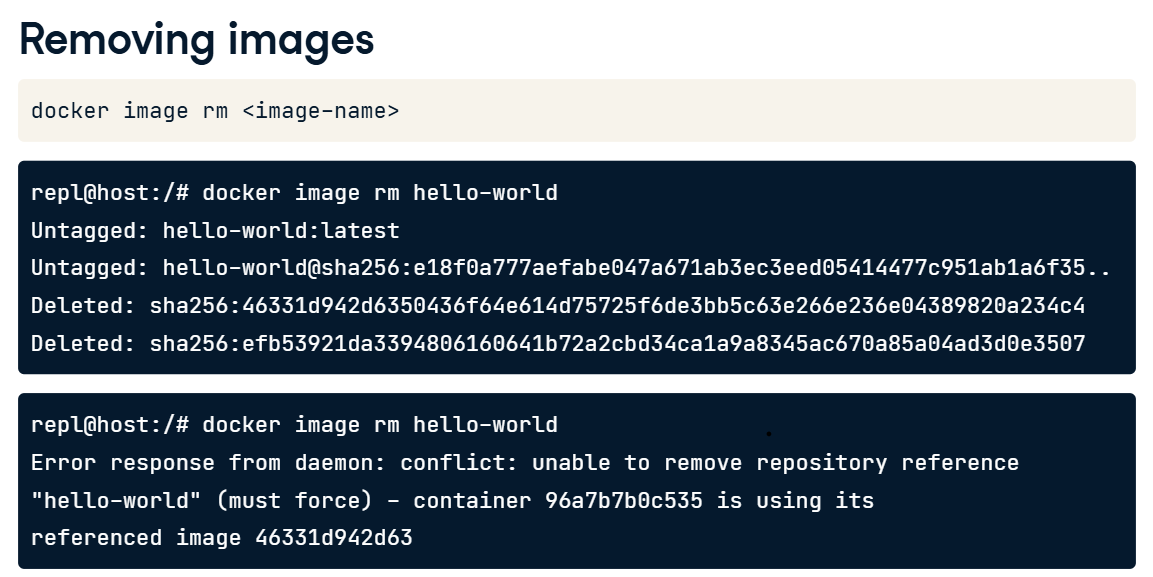

A container is a running image; a side effect of this is that you can only delete an image once there are no more containers based on it. If we try to delete an image for which we still have a container on our system, we'll get the warning.

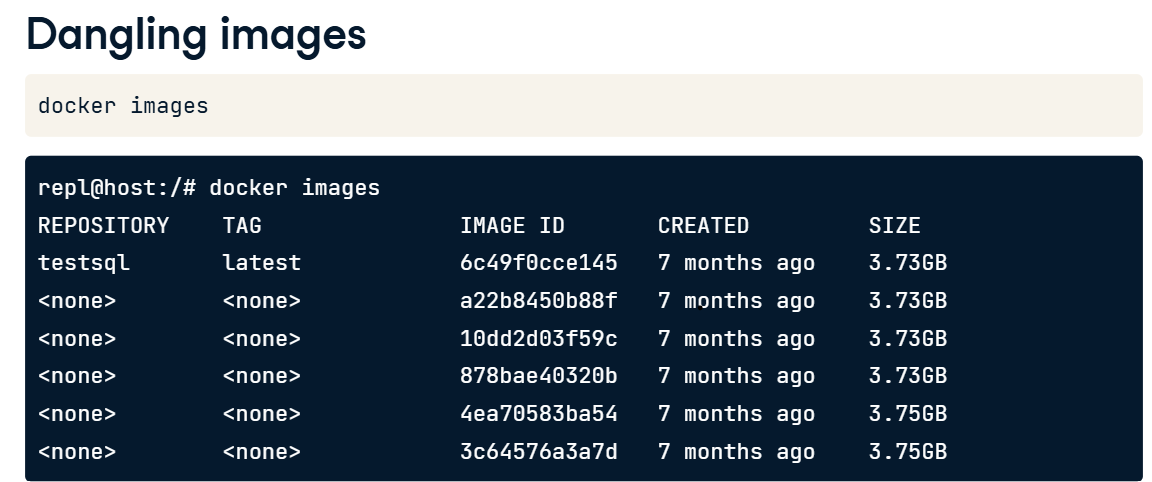

A dangling image is an image that no longer has a name because the name has been re-used for another image. This frequently occurs when creating our own images. For example, if we create an image called testsql, but we find a mistake and change our image slightly, the previous testsql image will then become dangling as our new fixed image now has the testsql name.

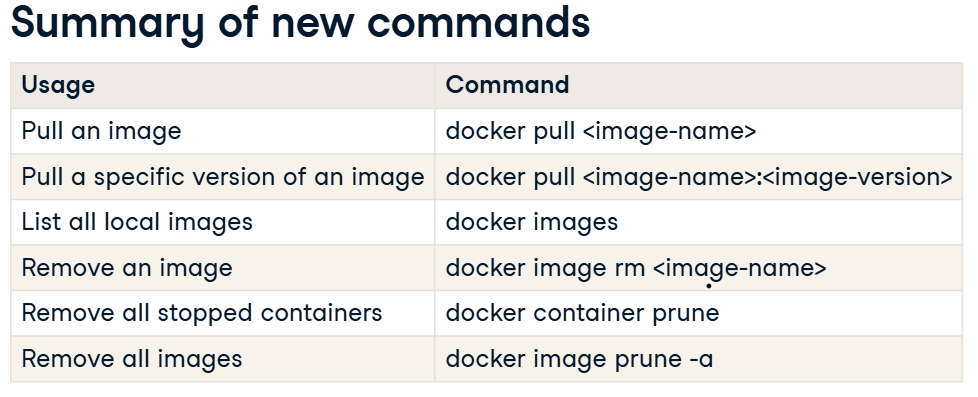


| **Command**                                    | **Description**                                           |
| ---------------------------------------------- | --------------------------------------------------------- |
| `docker images`                                | List all local Docker images                              |
| `docker build -t [NAME:TAG] .`                 | Build an image from a Dockerfile in the current directory |
| `docker tag [SOURCE_IMAGE] [TARGET_IMAGE:TAG]` | Add a new tag to an image                                 |
| `docker rmi [IMAGE]`                           | Remove a local image                                      |
| `docker image prune`                           | Remove unused images (dangling)                           |                           |
| `docker load -i [FILE.tar]`                    | Load an image from a tar archive                          |
| `docker inspect [IMAGE]`                       | View detailed info about an image                         |
| `docker history [IMAGE]`                       | Show the history of an image’s layers                     |
| `docker search [TERM]`                         | Search Docker Hub for images matching a term              |
